<a href="https://colab.research.google.com/github/aharonk/Day1_Assignment/blob/main/Day_1_Aharon_Katz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure we successfully import the data.

In [ ]:
import pandas

df = pandas.read_csv("https://raw.githubusercontent.com/aharonk/Day1_Assignment/main/data.csv")
orig, df.columns = df.columns, ['Temperature (\N{DEGREE SIGN}C)', 'Exhaust Vacuum (cm Hg)', 'Ambient Pressure (mbar)', 'Relative Humidity (%)', 'Energy Output (MW)']

In [ ]:
df.columns = orig 
df.isnull().sum()

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

See if we can tell at a glance if there are any correlations.

It seems that EP is associated with high Exhaust Vacuum pressure, and slightly less so Temperature. This makes sense to me, as higher temperature generally means something is working at higher capacity. At the same time the EV only has effect on the Steam Turbines, while the other three affect the Gas Turbines, meaning the EV has a much larger impact on the final energy produced.

The ambient pressure seems to be inversely correlated with the product, it seems the turbines, which are based on pressure, work better with a lower ambient pressure.

Relative Humidity does not seem to correlate much with the product.

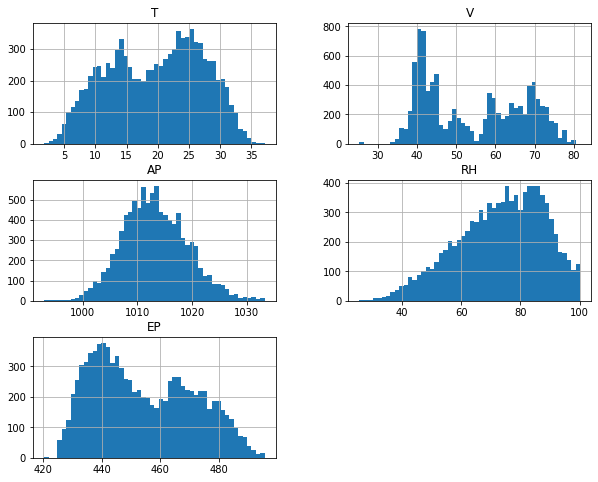

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(10,8))
plt.show()

Create a Linear Regression for our Production, and check if we have a good model:

In [ ]:
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.linear_model import LinearRegression
from datetime import datetime
import numpy as np

y = df[['EP']].copy()
x = df.drop('EP', axis=1)
r = int(datetime.now().strftime('%Y%m%d')) 

xtr, xts, ytr, yts = tts(x, y, test_size=0.2, random_state=r)

model = LinearRegression()
scores = cvs(model, xtr, ytr, cv=5)

print(scores)
print(np.mean(scores))

[0.92659955 0.92974497 0.93127154 0.92332637 0.92969623]
0.9281277316810339


Create another Linear Regression, without Humidity (which seems to account for less), and see which results are more accurate:

In [ ]:
x = df.drop(['EP', 'RH'], axis=1)

xtr, xts, ytr, yts = tts(x, y, test_size=0.2, random_state=r)

model = LinearRegression()
scores = cvs(model, xtr, ytr, cv=5)

print(scores)
print(np.mean(scores))

[0.9133896  0.92070825 0.92082646 0.91366117 0.92044418]
0.9178059314378595


Perhaps the Humidity is in fact related to the second peak in production.